## import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
from imutils import paths
import matplotlib.image as mpimg
import albumentations as A
from PIL import Image
import cv2
!pip install -qqq wandb
import wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


## download data

In [ ]:
!gdown --id 1K2I2Z-vpi-mW2EuNdTwiDH0nqQy8lsDH
!unzip /content/Flower_dataset.zip

## overview

In [ ]:
base_dir = '/content/Flower_dataset'
train_dir = '/content/Flower_dataset/train'
val_dir = '/content/Flower_dataset/valid'

In [ ]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = mpimg.imread(image_dir)
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(label)
    plt.tight_layout()
    plt.show()

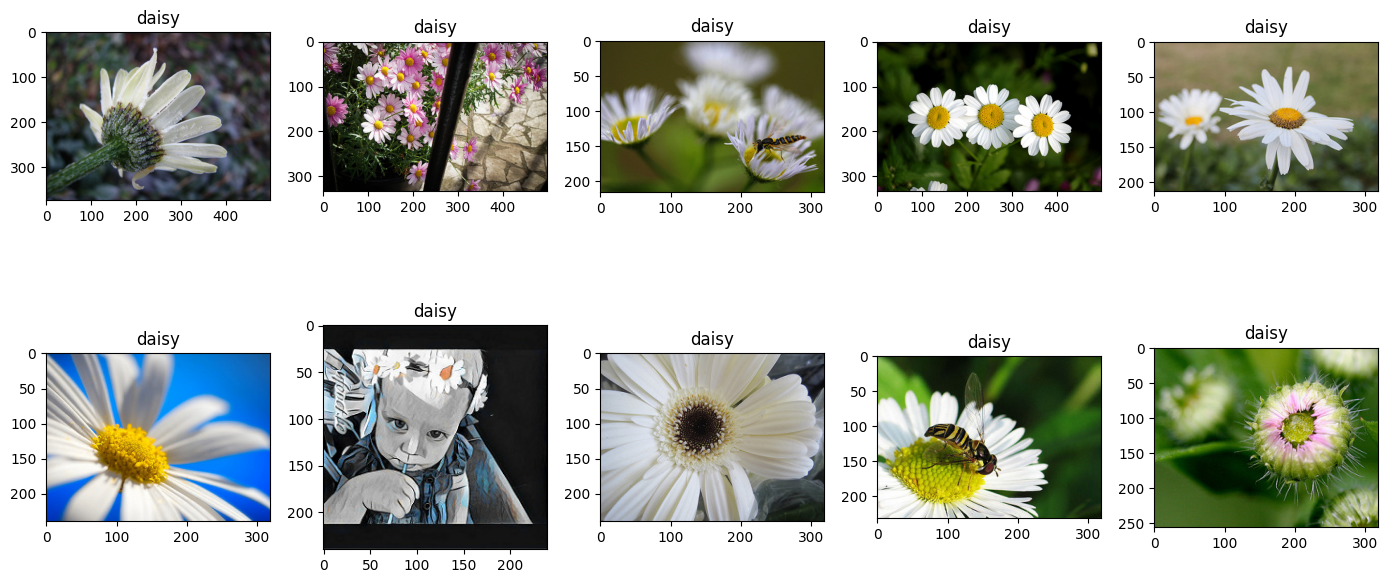

In [ ]:
plot_images(train_dir, label="daisy", num_sample=10)

## trainning

In [ ]:
%cd /content/drive/MyDrive/MLP-Mixer

/content/drive/MyDrive/MLP-Mixer


In [29]:
!python train.py -h

usage: train.py
       [-h]
       [--logger LOGGER]
       [--id-name ID_NAME]
       [--train-folder TRAIN_FOLDER]
       [--valid-folder VALID_FOLDER]
       [--model-folder MODEL_FOLDER]
       [--resume RESUME]
       [--save-interval SAVE_INTERVAL]
       [--model MODEL]
       [--num-classes NUM_CLASSES]
       [--num-mlp-blocks NUM_MLP_BLOCKS]
       [--patch-size PATCH_SIZE]
       [--hidden-dim HIDDEN_DIM]
       [--tokens-mlp-dim TOKENS_MLP_DIM]
       [--channels-mlp-dim CHANNELS_MLP_DIM]
       [--image-size IMAGE_SIZE]
       [--batch-size BATCH_SIZE]
       [--epochs EPOCHS]
       [--lr LR]
       [--image-channels IMAGE_CHANNELS]

options:
  -h, --help
    show this
    help
    message and
    exit
  --logger LOGGER
  --id-name ID_NAME
  --train-folder TRAIN_FOLDER
  --valid-folder VALID_FOLDER
  --model-folder MODEL_FOLDER
  --resume RESUME
    weight to
    resume
    training
  --save-interval SAVE_INTERVAL
  --model MODEL
    mixer_s32,
    mixer_s16,
    mixer_b3

In [27]:
!python train1.py --train-folder /content/Flower_dataset/train\
                 --valid-folder /content/Flower_dataset/valid\
                 --model-folder /content\
                 --model mixer_s32\
                 --num-classes 5\
                 --image-size 256\
                 --epochs 5\
                 --batch-size 128\
                 --lr 0.0001\
                 --logger wandb\
                 --save-interval 1\
                 --device 'cuda'

Training ...
wandb: Currently logged in as: hieu-ai007. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /content/drive/MyDrive/MLP-Mixer/wandb/run-20230602_072152-k9y7e9sa
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run mixer_s32
wandb: ⭐️ View project at https://wandb.ai/hieu-ai007/MLP-Mixer
wandb: 🚀 View run at https://wandb.ai/hieu-ai007/MLP-Mixer/runs/k9y7e9sa
Epoch : 1, train accuracy : 0.3682316839694977, train loss : 1.432275414466858
Epoch : 1, val_accuracy : 0.434495210647583, val_loss : 1.3146966695785522
Checkpoint saved to /content/mixer_s32_1.pt
Epoch : 2, train accuracy : 0.4507913887500763, train loss : 1.2866601943969727
Epoch : 2, val_accuracy : 0.504807710647583, val_loss : 1.2000995874404907
Checkpoint saved to /content/mixer_s32_2.pt
Epoch : 3, train accuracy : 0.47108784317970276, train loss : 1.233956217765808
Epoch : 3, val_accuracy : 0.4936298131942749, val_loss : 1

## testing

In [30]:
%cd /content/drive/MyDrive/MLP-Mixer

/content/drive/MyDrive/MLP-Mixer


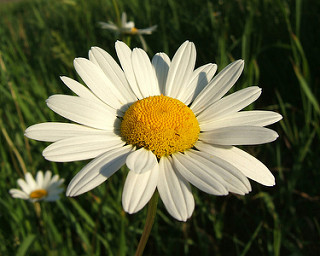

In [31]:
image = Image.open('/content/162362896_99c7d851c8_n.jpg')
image.show()

In [33]:
!python predict.py --source /content/162362896_99c7d851c8_n.jpg\
                   --image-size 256\
                   --model weights/mixer_s32.pt\
                   --device 'cuda'

Predicted label: daisy
